## How well do jobs and skills pay for Data Analysts?

### Import Libraries and Data

In [2]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
df=pd.read_csv('C:/Users/Admin/Downloads/job_postings.csv')

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

### Salary Distribution by Job Title

In [3]:
# filter for job titles and country
df_IND=df[df['job_country']=='India'].dropna(subset=['salary_year_avg'])

In [4]:
job_titles=df['job_title_short'].value_counts().index[:6].tolist()


# filter df for the top 6 job titles
df_IND_top6=df_IND[df_IND['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order=df_IND_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Senior Data Engineer',
 'Business Analyst',
 'Software Engineer']

### Plot Salary Distribution

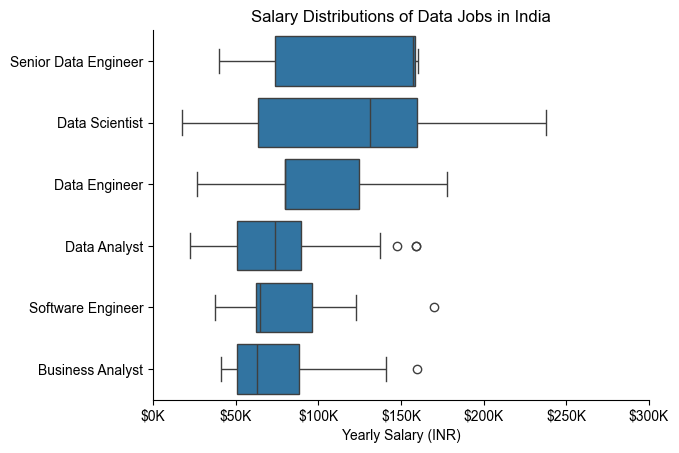

In [5]:
sns.boxplot(data=df_IND_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in India')
plt.xlabel('Yearly Salary (INR)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigate Median Salary Vs Skill For Data Analyst

In [6]:
# get data analyst jobs in India
df_DA_IND=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()

# drop NaN values from 'salary_year_avg' column
df_DA_IND=df_DA_IND.dropna(subset=['salary_year_avg'])

df_DA_IND=df_DA_IND.explode('job_skills')

df_DA_IND[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
2922,70200.0,excel
3397,43200.0,sql
3397,43200.0,python
3397,43200.0,r
3397,43200.0,oracle


### Determine The Highest Paid Skills and Most Demanded Skills

In [7]:
df_top_pay=df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_top_pay=df_top_pay.head(10)

df_top_pay

,count,median
job_skills,,
tensorflow,2,153250.0
c++,1,147500.0
javascript,1,147500.0
c,1,147500.0
sas,2,147500.0
jupyter,1,147500.0
css,1,137500.0
html,1,137500.0
pyspark,2,124500.0


In [8]:
df_top_skills=df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_top_skills=df_top_skills.head(10).sort_values(by='median', ascending=False)

df_top_skills

,count,median
job_skills,,
word,5,118065.00
sap,6,96375.00
python,22,80612.50
excel,24,74458.75
sql,36,71850.00
oracle,5,70000.00
tableau,12,69000.00
r,10,67950.00
aws,8,51600.00


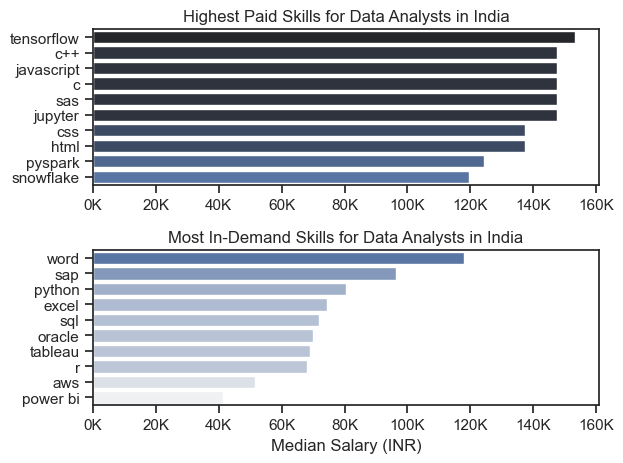

In [13]:
fig, ax=plt.subplots(2, 1)

sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

sns.barplot(data=df_top_skills, x='median', y=df_top_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (INR)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()